Let's setup our IPYTHON environment.


In [1]:
%matplotlib inline
import moose
import numpy 
import pylab

We setup a very simple irreversible reaction $A + B \rightarrow C$ with rate constant $k = 1$.

All chemical reaction happens in a compartment which has a volume (SI units, $m^{-3}$), and one can optionally specifies if compartment is diffusive or not (here we don't care).

In [2]:
compt = moose.CubeMesh('/compt')
compt.volume = 1e-15

This compartment should be filled with three chemical species, A, B, and C. MOOSE implement them as `Pool`. Another related class is `BufPool` which is used if concentration of chemical species remains constant during the reaction.

Let's specifies our reactants and product of reaction and assign initial concentration to them.

In [3]:
a = moose.Pool('/compt/chemA')
a.concInit = 10.0
b = moose.Pool('/compt/chemB')
b.concInit = 5.0
c = moose.Pool('/compt/chemC')
c.concInit = 0.0

The paths of a, b and c are under `/compt`. In such a scenario, MOOSE automatically assign `compt` volume to these pools.

In [4]:
print("%s,%s,%s" % (a.volume, b.volume, c.volume))

Next, we create a reaction in MOOSE using `moose.Reac` class, and assign subtrate, product and rate constant.

In [5]:
reac = moose.Reac('/compt/reac')
reac.connect('sub', a, 'reac')  # substrate
reac.connect('sub', b, 'reac')  # substrate
reac.connect('prd', c, 'reac')  # product of reaction

In [6]:
reac.Kf = 1.0
reac.Kb = 0.0 # no backward reaction 

Since we would like to see the results after simulation, we need to setup recorders. In MOOSE, this is achieved by setting up `moose.Table2` or `moose.Table`. Using `moose.Table2` is recommended for chemical reactions for these tables are designed for recording from chemical reactions and are faster, though `moose.Table` can also be used with same speed after modifying default `dt` parameters. We don't discuss them here.

In [7]:
outputA = moose.Table2('/a')
outputB = moose.Table2('/b')
outputC = moose.Table2('/c')
outputA.connect('requestOut', a, 'getConc')
outputB.connect('requestOut', b, 'getConc')
outputC.connect('requestOut', c, 'getConc')

We have setup our reaction and tables in MOOSE. Its time to simulate and plot the results.

In [8]:
moose.reinit()
moose.start(10) # run for 10 seconds.

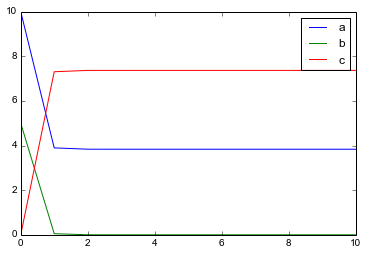

In [9]:
for table in [outputA, outputB, outputC]:
    t = numpy.arange(0, table.vector.size, 1)  # seconds
    pylab.plot(t, table.vector, label = table.name)
pylab.legend()
pylab.show()

And we are done. NOTICE that _result is not correct_! Ideally at the end of this reaction, we must have equal concentration of a and c while b must go to zero. To be specific, all amount of b should react with equal no of molecules of a and produce c. The amount of c must be equal to the amount of b consumed.

Default settings in MOOSE are customised for quick chemical simulation which is very useful when it comes to simulation for very long time. When we make simulation faster, we loose accuracy!

The simulation speed is configured by changing step size of `moose.Clock` associated with MOOSE class handling particular. The default clocks responsible for chemical simulations are numbered between 11 to 15. We can reduce their step size and redo the simulation with increased accuracy.

In [10]:
for i in range(11, 15):
    moose.setClock(i, 0.001)  # 0.001 seconds step size

In [11]:
moose.reinit()
moose.start(10)

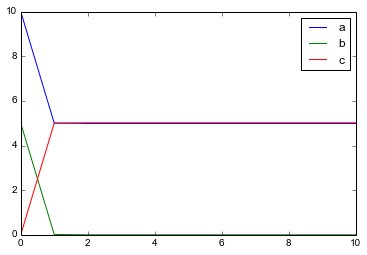

In [12]:
for table in [outputA, outputB, outputC]:
    t = numpy.arange(0, table.vector.size, 1)  # seconds
    pylab.plot(t, table.vector, label = table.name)
pylab.legend()
pylab.show()

This looks more promising and correct.

- [A simple irreversible reaction](./simple_reaction_reversible.ipynb)